In [3]:
import os

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [1]:
sc = SparkContext.getOrCreate()
ss = SparkSession.builder.getOrCreate()

## Import data from mongodb

In [2]:
pyspark_submit_args = '--packages org.mongodb.spark:mongo-spark-connector_2.11:2.4.0 pyspark-shell'
os.environ["PYSPARK_SUBMIT_ARGS"] = pyspark_submit_args


spark = SparkSession \
    .builder \
    .appName("myApp") \
    .config("spark.mongodb.input.uri", "mongodb://52.27.215.97/mydb.brazil")\
    .getOrCreate()

df = spark.read.format("com.mongodb.spark.sql.DefaultSource").load()

In [4]:
def IntegerSafe(x):
    try:
        return int(x)
    except:
        return None 
    
def FloatSafe(x):
    try:
        return float(x)
    except:
        return None 

In [5]:
weather_rdd = df.rdd
weather_rdd.take(1)

[Row(_id=Row(oid=u'5c415d222080b515fa780857'), city=u'S\xe3o Gon\xe7alo', da=6, date=u'2007-11-06', dewp=12.1, dmax=16.8, dmin=10.8, elvt=237.0, gust=6.5, hmax=58.0, hmdy=35.0, hmin=32.0, hr=0, inme=u'A333', lat=-6.835777, lon=-38.311583, mdct=u'2007-11-06 00:00:00', mo=11, prov=u'RJ', smax=982.5, smin=981.3, stp=982.5, temp=29.3, tmax=29.7, tmin=25.5, wdct=101.0, wsid=178, wsnm=u'S\xc3O GON\xc7ALO', yr=2007)]

## Cast data to correct datatypes and create dataframe

In [6]:
weather_rdd_casted = weather_rdd.map(lambda x: [x[1],\
                          IntegerSafe(x[2]),\
                          x[3],\
                          FloatSafe(x[4]),\
                          FloatSafe(x[5]),\
                          FloatSafe(x[6]),\
                          FloatSafe(x[7]),\
                          FloatSafe(x[8]),\
                          FloatSafe(x[9]),\
                          FloatSafe(x[10]),\
                          FloatSafe(x[11]),\
                          IntegerSafe(x[12]),\
                          x[13],\
                          FloatSafe(x[14]),\
                          FloatSafe(x[15]),\
                          x[16],\
                          IntegerSafe(x[17]),\
                          x[18],\
                          FloatSafe(x[19]),\
                          FloatSafe(x[20]),\
                          FloatSafe(x[21]),\
                          FloatSafe(x[22]),\
                          FloatSafe(x[23]),\
                          FloatSafe(x[24]),\
                          FloatSafe(x[25]),\
                          IntegerSafe(x[26]),\
                          x[27],\
                          IntegerSafe(x[28])]
                          )

In [7]:
schema = StructType([StructField("city", StringType(), False),
                    StructField("da", IntegerType(), False),
                    StructField("date", StringType(), False),
                    StructField("dewp", DoubleType(), True),
                    StructField("dmax", DoubleType(), True),
                    StructField("dmin", DoubleType(), True),
                    StructField("elvt", DoubleType(), True),
                    StructField("gust", DoubleType(), True),
                    StructField("hmax", DoubleType(), True),
                    StructField("hmdy", DoubleType(), True),
                    StructField("hmin", DoubleType(), True),
                    StructField("hr", IntegerType(), False),
                    StructField("inme", StringType(), False),
                    StructField("lat", DoubleType(), True),
                    StructField("lon", DoubleType(), True),
                    StructField("mdct", StringType(), False),
                    StructField("mo", IntegerType(), False),
                    StructField("prov", StringType(), False),
                    StructField("smax", DoubleType(), True),
                    StructField("smin", DoubleType(), True),
                    StructField("stp", DoubleType(), True),
                    StructField("temp", DoubleType(), True),
                    StructField("tmax", DoubleType(), True),
                    StructField("tmin", DoubleType(), True),
                    StructField("wdct", DoubleType(), True),
                    StructField("wsid", IntegerType(), False),
                    StructField("wsnm", StringType(), False),
                    StructField("yr", IntegerType(), False)
                   ])

In [8]:
weather_df = ss.createDataFrame(weather_rdd_casted, schema)
weather_df.show(5)

+-----------+---+----------+----+----+----+-----+----+----+----+----+---+----+---------+----------+-------------------+---+----+-----+-----+-----+----+----+----+-----+----+-----------+----+
|       city| da|      date|dewp|dmax|dmin| elvt|gust|hmax|hmdy|hmin| hr|inme|      lat|       lon|               mdct| mo|prov| smax| smin|  stp|temp|tmax|tmin| wdct|wsid|       wsnm|  yr|
+-----------+---+----------+----+----+----+-----+----+----+----+----+---+----+---------+----------+-------------------+---+----+-----+-----+-----+----+----+----+-----+----+-----------+----+
|São Gonçalo|  6|2007-11-06|12.1|16.8|10.8|237.0| 6.5|58.0|35.0|32.0|  0|A333|-6.835777|-38.311583|2007-11-06 00:00:00| 11|  RJ|982.5|981.3|982.5|29.3|29.7|25.5|101.0| 178|SÃO GONÇALO|2007|
|São Gonçalo|  6|2007-11-06|13.5|13.6|12.2|237.0| 6.4|39.0|39.0|35.0|  1|A333|-6.835777|-38.311583|2007-11-06 01:00:00| 11|  RJ|983.2|982.5|983.2|29.0|29.9|29.0| 94.0| 178|SÃO GONÇALO|2007|
|São Gonçalo|  6|2007-11-06|14.0|14.0|13.6|237.0| 

## Data preprocessing

In [9]:
# Drop unncessesary cols
weather_df = weather_df.drop('wsid', 'wsnm', 'elvt', 'lat' ,' lon', 'inme', 'prov', 'prcp', 'gbrd', 'mdct', 'date', 'yr', 'da', 'lon')
weather_df.printSchema()

root
 |-- city: string (nullable = false)
 |-- dewp: double (nullable = true)
 |-- dmax: double (nullable = true)
 |-- dmin: double (nullable = true)
 |-- gust: double (nullable = true)
 |-- hmax: double (nullable = true)
 |-- hmdy: double (nullable = true)
 |-- hmin: double (nullable = true)
 |-- hr: integer (nullable = false)
 |-- mo: integer (nullable = false)
 |-- smax: double (nullable = true)
 |-- smin: double (nullable = true)
 |-- stp: double (nullable = true)
 |-- temp: double (nullable = true)
 |-- tmax: double (nullable = true)
 |-- tmin: double (nullable = true)
 |-- wdct: double (nullable = true)



In [10]:
# OneHotEncode hours and month

from pyspark.ml.feature import OneHotEncoder
def oneHotEncodeColumns(df, cols):
    newdf = df
    for c in cols:
        #For each given colum, create OneHotEncoder. 
        #dropLast : Whether to drop the last category in the encoded vector (default: true)
        onehotenc = OneHotEncoder(inputCol=c, outputCol=c+"-onehot", dropLast=False)
        #Creates a DataFame by putting the transformed values in the new colum with suffix "-onehot" 
        #and then drops the original columns.
        #and drop the "-onehot" suffix. 
        newdf = onehotenc.transform(newdf).drop(c)
        newdf = newdf.withColumnRenamed(c+"-onehot", c)
    return newdf

weather_df_hot = oneHotEncodeColumns(weather_df, ["hr", "mo"])

In [11]:
# Merging the data with Vector Assembler.
from pyspark.ml.feature import VectorAssembler
input_cols = weather_df_hot.columns[1:]

va = VectorAssembler(outputCol="features", inputCols=input_cols)
#lpoints = labeled data.
lpoints = va.transform(weather_df_hot)

In [12]:
# Turn labels into numerical values
#converting strings to numeric values
from pyspark.ml.feature import StringIndexer

#For each given colum, fits StringIndexerModel.
si = StringIndexer(inputCol="city", outputCol="label")
sm = si.fit(lpoints)
#Creates a DataFame by putting the transformed values in the new colum with suffix "-num" 
#and then drops the original columns.
#and drop the "-num" suffix. 
lpoints = sm.transform(lpoints)


## Splitting data into train/test samples and cache

In [15]:
# Train test split
#Divide the dataset into training and testing sets.
lpoints = lpoints.coalesce(72)
splits = lpoints.randomSplit([0.9, 0.1])

#cache() : the algorithm is interative and training and data sets are going to be reused many times.
train = splits[0].cache()
test = splits[1].cache()

In [16]:
print "Training sample size: %s" % str(train.count())
print "Test sample size: %s" % str(test.count())

Training sample size: 8558132
Test sample size: 949752


## Machine Learning (logistic regression and random forest classifier)

In [67]:
# Logistic Regression (training)
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(regParam=0.01, maxIter=100, fitIntercept=True)

lrmodel = lr.fit(train)

In [68]:
# Logistic Regression (predicting)
pred_lr = lrmodel.transform(test)

In [24]:
# Random Forest Classifier (training)
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(maxDepth=10, numTrees=10)
rfmodel = rf.fit(train)

In [22]:
# Random Forest Classifier (test)
pred_rf = rfmodel.transform(test)

### Model evaluations (accuracy, F1 and confusion matrix)

In [27]:
# Evaluate LR model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator_acc = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

lr_acc = evaluator_acc.evaluate(pred);
lr_f1 = evaluator_f1.evaluate(pred)
print "LR {0} : {1}".format(evaluator_acc.getMetricName(), lr_acc)
print "LR {0} : {1}".format(evaluator_f1.getMetricName(), lr_f1)

rf_acc = evaluator_acc.evaluate(pred_rf);
rf_f1 = evaluator_f1.evaluate(pred_rf)
print "RFC {0} : {1}".format(evaluator_acc.getMetricName(), rf_acc)
print "RFC {0} : {1}".format(evaluator_f1.getMetricName(), rf_f1)

LR accuracy : 0.050666910941
LR f1 : 0.0230249123295
RFC accuracy : 0.264146850967
RFC f1 : 0.233322111541


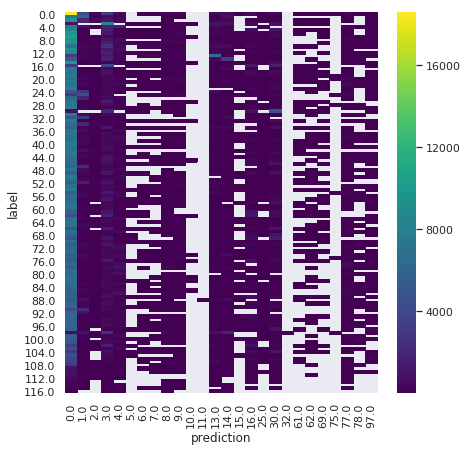

In [72]:
import pandas as pd
conf_matrix_lr = pred_lr.select('label','prediction')\
                        .groupBy('label','prediction')\
                        .count()\
                        .orderBy(["label", "prediction"])\
                        .toPandas()
conf_matrix_unstack_lr = pd.crosstab(index=conf_matrix_lr['label'], columns=conf_matrix_lr['prediction'],
                                     values=conf_matrix_lr['count'], aggfunc='mean')

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(conf_matrix_unstack_lr, cmap="viridis")

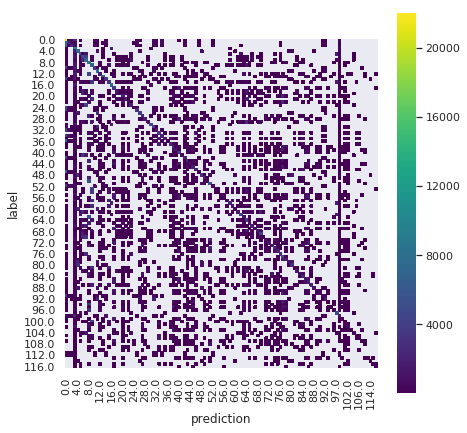

In [70]:
# Random Forest Classifier confusion matrix
conf_matrix_rf = pred_rf.select('label','prediction')\
                        .groupBy('label','prediction')\
                        .count()\
                        .orderBy(["label", "prediction"])\
                        .toPandas()
conf_matrix_unstack_rf = pd.crosstab(index=conf_matrix_rf['label'], columns=conf_matrix_rf['prediction'],
                                     values=conf_matrix_rf['count'], aggfunc='mean')


sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(conf_matrix_unstack_rf, cmap="viridis", square=True)